<a href="https://colab.research.google.com/github/WOLVS/AditoryAttention/blob/main/18swndtuft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os

folder_path = '/content/drive/MyDrive/WHOLETUFTDATA'  # adjust if you uploaded to a subfolder
print("Files in folder:", os.listdir(folder_path))  # list first 5 files


Files in folder: ['sub_22.csv', 'sub_14.csv', 'sub_55.csv', 'sub_5.csv', 'sub_42.csv', 'sub_24.csv', 'sub_43.csv', 'sub_36.csv', 'sub_27.csv', 'sub_49.csv', 'sub_45.csv', 'sub_34.csv', 'sub_28.csv', 'sub_51.csv', 'sub_46.csv', 'sub_40.csv', 'sub_1.csv', 'sub_13.csv', 'sub_25.csv', 'sub_52.csv', 'sub_37.csv', 'sub_21.csv', 'sub_38.csv', 'sub_32.csv', 'sub_23.csv', 'sub_48.csv', 'sub_31.csv', 'sub_15.csv', 'sub_47.csv', 'sub_29.csv', 'sub_56.csv', 'sub_20.csv', 'sub_44.csv', 'sub_35.csv', 'sub_54.csv', 'sub_92.csv', 'sub_95.csv', 'sub_7.csv', 'sub_65.csv', 'sub_71.csv', 'sub_63.csv', 'sub_80.csv', 'sub_79.csv', 'sub_94.csv', 'sub_82.csv', 'sub_75.csv', 'sub_78.csv', 'sub_93.csv', 'sub_74.csv', 'sub_86.csv', 'sub_57.csv', 'sub_76.csv', 'sub_64.csv', 'sub_81.csv', 'sub_83.csv', 'sub_97.csv', 'sub_69.csv', 'sub_85.csv', 'sub_58.csv', 'sub_60.csv', 'sub_62.csv', 'sub_72.csv', 'sub_84.csv', 'sub_70.csv', 'sub_68.csv', 'sub_91.csv', 'sub_61.csv', 'sub_73.csv']


In [ ]:
# Get all CSV files
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Print the number of files
print(f"Number of CSV files: {len(csv_files)}")

Number of CSV files: 68


In [ ]:
import pandas as pd

all_dfs = []
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(folder_path, file))
        df['subject'] = file.replace('.csv', '')
  # keep subject/file info
        all_dfs.append(df)

df_all = pd.concat(all_dfs, ignore_index=True)
print("Shape:", df_all.shape)


Shape: (463488, 10)


In [ ]:
print(df_all['label'].value_counts())

label
0    115872
1    115872
2    115872
3    115872
Name: count, dtype: int64


In [ ]:
df_all['label_binary'] = df_all['label'].map(lambda x: 0 if x in [0, 1] else 1)


In [ ]:
print(df_all['label'].unique())

[0 1 2 3]


In [ ]:
print(df_all['label_binary'].value_counts())

label_binary
0    231744
1    231744
Name: count, dtype: int64


In [ ]:
print(df_all.groupby('label')['label_binary'].unique())

label
0    [0]
1    [0]
2    [1]
3    [1]
Name: label_binary, dtype: object


In [ ]:
import numpy as np
import pandas as pd

def sliding_window_tufts_style(df, fs=5.2, window_sec=18, stride_sec=0.6):
    window_size = int(window_sec * fs)  # 93 samples
    stride = int(stride_sec * fs)       # 3 samples

    feature_cols = [col for col in df.columns if col.startswith('AB') or col.startswith('CD')]
    X, y = [], []

    data = df[feature_cols].values       # shape: (n_samples, n_channels)
    labels = df['label_binary'].values   # shape: (n_samples,)

    for start in range(0, len(df) - window_size + 1, stride):
        end = start + window_size
        window = data[start:end]  # shape: (93, n_channels)

        label = labels[end - 1]   #

        X.append(window)
        y.append(label)

    return np.array(X), np.array(y)


In [ ]:
X, y = sliding_window_tufts_style(df_all)
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Label distribution:", np.bincount(y))


X shape: (154466, 93, 8)
y shape: (154466,)
Label distribution: [77218 77248]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_example_window(df, fs=5.2, window_sec=18, stride_sec=0.6, channel='AB_I_O'):
    window_size = int(window_sec * fs)
    stride_samples = int(stride_sec * fs)

    feature_cols = [col for col in df.columns if col.startswith('AB') or col.startswith('CD')]
    df = df_all.head(300)  # ~60 seconds of data at 5.2 Hz
  # Show a short preview segment
    time = np.arange(len(df)) / fs

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(time, df[channel], label=channel, color='black', alpha=0.6)

    num_windows_to_plot = 5
    for i in range(num_windows_to_plot):
        start = i * stride_samples
        end = start + window_size
        if end >= len(df):
            break

        t_start = start / fs
        t_end = end / fs
        ax.axvspan(t_start, t_end, color='skyblue', alpha=0.3, label='Sliding Window' if i == 0 else None)

        # Mark the label point
        label_time = (end - 1) / fs
        label_val = df[channel].iloc[end - 1]
        ax.plot(label_time, label_val, 'ro', label='Label point' if i == 0 else None)

    ax.set_xlabel("Time (s)")
    ax.set_ylabel("fNIRS signal")
    ax.set_title(f"Sliding Window Example on Channel {channel}")
    ax.legend()
    plt.tight_layout()
    plt.show()



In [ ]:
print([col for col in df_all.columns if col.startswith('AB') or col.startswith('CD')])


['AB_I_O', 'AB_PHI_O', 'AB_I_DO', 'AB_PHI_DO', 'CD_I_O', 'CD_PHI_O', 'CD_I_DO', 'CD_PHI_DO']


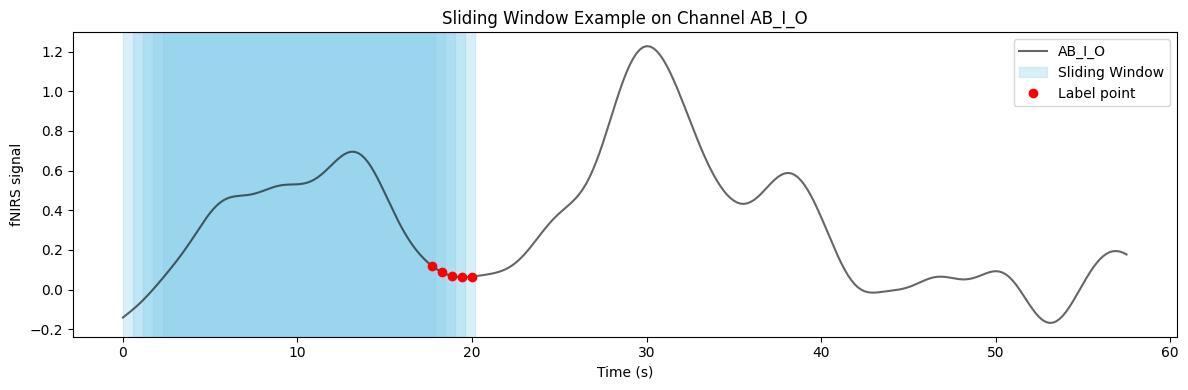

In [ ]:
plot_example_window(df_all, channel='AB_I_O')




In [ ]:
window_size = int(18 * 5.2)
stride = int(0.6 * 5.2)
num_windows = (len(df_all) - window_size) // stride + 1
print(f"Total possible windows: {num_windows}")


Total possible windows: 154466


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Random split
train_idx, val_idx = train_test_split(np.arange(len(y)), test_size=0.2, random_state=42)
splits = (list(train_idx), list(val_idx))

X_train, X_val = X[splits[0]], X[splits[1]]
y_train, y_val = y[splits[0]], y[splits[1]]

print("Train data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Train labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)


Train data shape: (123572, 8, 93)
Validation data shape: (30894, 8, 93)
Train labels shape: (123572,)
Validation labels shape: (30894,)


In [ ]:
# X currently: (N, 150, 8)  -> (N, seq_len, n_vars)
X = np.transpose(X, (0, 2, 1))  # -> (N, n_vars=8, seq_len=150)

In [4]:
print(np.unique(y))

print("X shape:", X.shape)
print(np.unique(y))
print("y shape:", y.shape)

NameError: name 'np' is not defined

In [ ]:
!pip install tsai==0.4.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.1/324.1 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 871.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from tsai.all import *
from fastai.callback.all import SaveModelCallback
%env CUDA_LAUNCH_BLOCKING=1


# Define transforms
tfms = [None, [Categorize()]]

# Build datasets
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)

# Create DataLoaders
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid,
                               bs=[64, 128],
                               batch_tfms=[TSStandardize()],
                               num_workers=0)
print("X shape:", X.shape)
print(np.unique(y))
print("y shape:", y.shape)

env: CUDA_LAUNCH_BLOCKING=1
X shape: (154466, 8, 93)
[0 1]
y shape: (154466,)


epoch,train_loss,valid_loss,accuracy,time
0,0.651738,0.651535,0.612902,00:53
1,0.632624,0.644632,0.627436,00:52
2,0.631195,0.637662,0.629993,00:52
3,0.629334,0.626303,0.644397,00:52
4,0.616695,0.632060,0.636208,00:52
5,0.602071,0.603042,0.665242,00:52
6,0.577344,0.583474,0.678417,00:52
7,0.508933,0.513427,0.731857,00:52
8,0.405696,0.414838,0.801580,00:52
9,0.294014,0.274166,0.883667,00:52


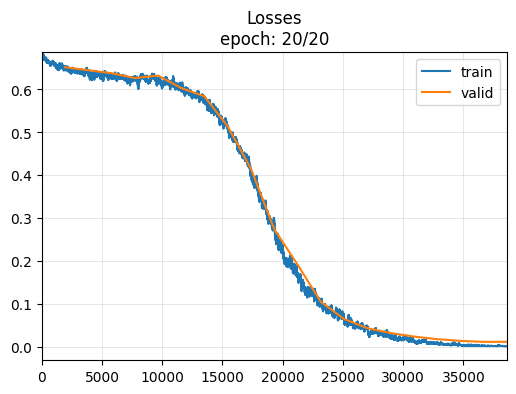

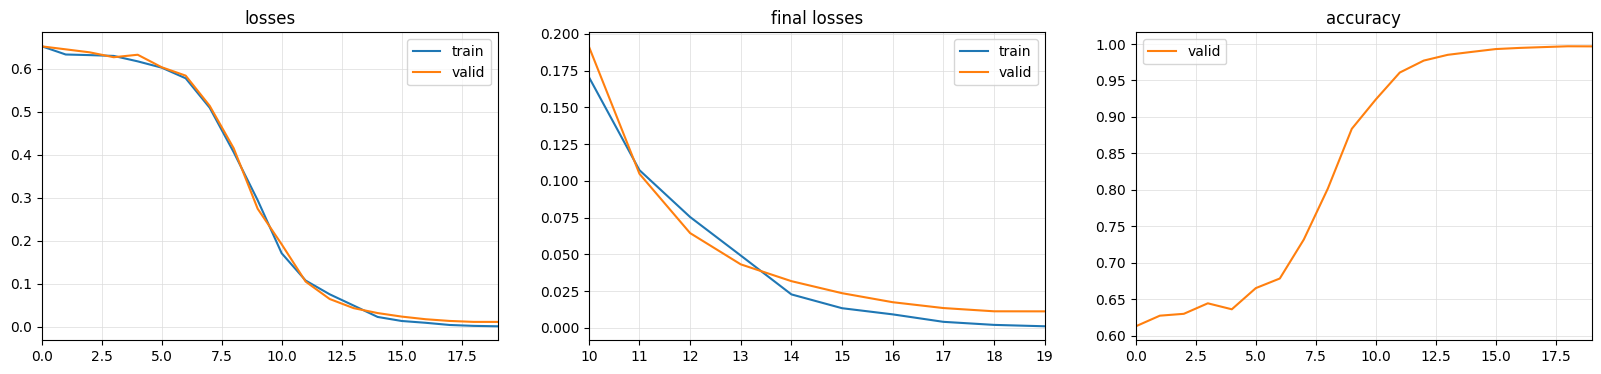

Path('models/models/LSTM_Tufts18_Weights.pth')

In [ ]:
from tsai.all import *

arch = LSTM
arch_config = {'n_layers': 3, 'bidirectional': True}
mv_clf = TSClassifier(X, y, splits=splits,
                      path='models',
                      arch=arch,
                      arch_config=arch_config,
                      tfms=[None, [Categorize()]],
                      batch_tfms=[TSStandardize()],
                      metrics=accuracy,
                      cbs=ShowGraph())  #

# Train the model
mv_clf.fit_one_cycle(20, 1e-3)

# Save the model
mv_clf.save('LSTM_Tufts18_Weights')


In [ ]:
print(mv_clf.model)

LSTM(
  (rnn): LSTM(8, 100, num_layers=3, batch_first=True, bidirectional=True)
  (dropout): Identity()
  (fc): Linear(in_features=200, out_features=2, bias=True)
)


In [ ]:
# Print any LSTM modules (will show hidden_size, num_layers, bidirectional, dropout)
for m in mv_clf.model.modules():
    if isinstance(m, torch.nn.LSTM):
        print(m)

LSTM(8, 100, num_layers=3, batch_first=True, bidirectional=True)


In [1]:
logits, preds, targs = mv_clf.get_preds(with_input=False, with_decoded=True)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(targs, preds)
print(f"Accuracy on Tufts val: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(targs, preds))
print("\nConfusion Matrix:")
print(confusion_matrix(targs, preds))


NameError: name 'mv_clf' is not defined

In [3]:
logits_train, targs_train = mv_clf.get_preds(ds_idx=0, with_input=False, with_decoded=False)

from sklearn.metrics import accuracy_score

# Use logits_train instead of preds_train
train_acc = accuracy_score(targs_train, logits_train.argmax(axis=1))
print(f"Training accuracy: {train_acc:.4f}")


NameError: name 'mv_clf' is not defined

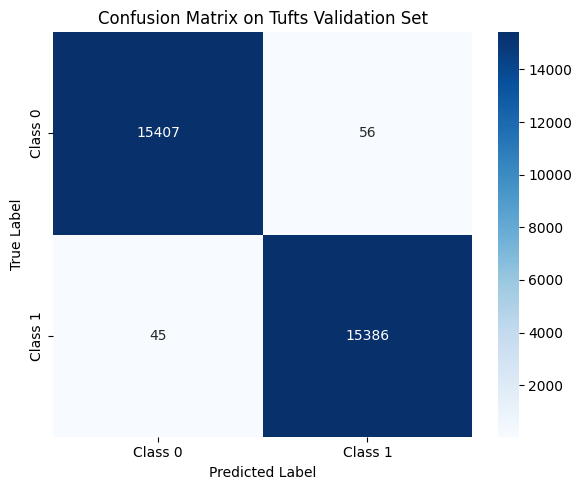

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(targs, preds)
labels = ["Class 0", "Class 1"]

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Add labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Tufts Validation Set")
plt.tight_layout()
plt.show()

In [ ]:
print(dls.vars, dls.len)   # should be 8,93

8 93


In [ ]:
from tsai.all import *

# Step 1: Create model with correct architecture
model = create_model(LSTM, c_in=8, c_out=2, seq_len=150, arch_config={'n_layers': 3, 'bidirectional': True})

# Step 2:  dummy dataloaders
def get_dummy_dl(seq_len=150, n_vars=8, n_classes=2):
    X_dummy = np.random.randn(2, n_vars, seq_len).astype(np.float32)  # (2, 8, 150)
    y_dummy = np.array([0, 1])
    tfms = [None, [Categorize()]]
    dsets = TSDatasets(X_dummy, y_dummy, tfms=tfms)
    return TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=2)

dls = get_dummy_dl()


learn = Learner(
    dls, model, metrics=accuracy,
    path='models/models',
    model_dir='.'          # f
)

# Step 4: Load weights and export
learn.load('LSTM_Tufts18_Weights')
learn.export("LSTM_Tufts_Ccclean18.pkl")

In [2]:
import os

for root, dirs, files in os.walk("models/models"):
    for file in files:
        if file.endswith(".pkl"):
            print(" Found:", os.path.join(root, file))

In [ ]:
from google.colab import files
files.download("/content/models/models/LSTM_Tufts_Ccclean18.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving LSTM_final18_clean_export.pkl to LSTM_final18_clean_export.pkl


In [ ]:
from tsai.all import *
import pathlib
import sys

# Patch to avoid WindowsPath issues if needed
if sys.platform == "linux":
    pathlib.WindowsPath = pathlib.PosixPath

learn = load_learner("LSTM_final18_clean_export.pkl")


In [ ]:
from tsai.all import *
from tsai.data.core import TSTensor
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure dtype + type
X = X.astype(np.float32)
Xt = TSTensor(X)

# Get predictions (your loaded learner from the .pkl or weights)
probs, targs = learn.get_X_preds(Xt, y=y, bs=128)[:2]
preds = probs.argmax(1).cpu().numpy()
true_y = y if targs is None else targs.cpu().numpy()

print("Accuracy:", accuracy_score(true_y, preds))
print(classification_report(true_y, preds, digits=3))
print(confusion_matrix(true_y, preds))

Accuracy: 0.44029754120647907
              precision    recall  f1-score   support

           0      0.461     0.706     0.558     77218
           1      0.373     0.174     0.238     77248

    accuracy                          0.440    154466
   macro avg      0.417     0.440     0.398    154466
weighted avg      0.417     0.440     0.398    154466

[[54542 22676]
 [63779 13469]]


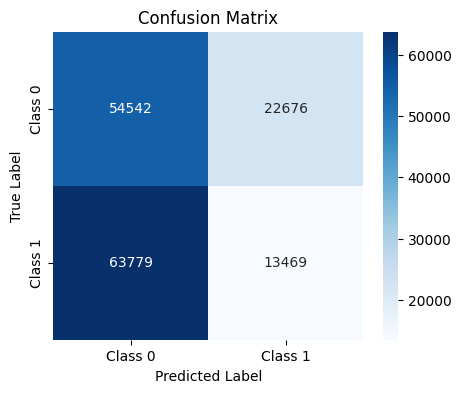

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_y, preds)

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(X.shape)          # should be (N, 8, 150)
print(X.dtype)          # should be float32
print(len(y))           # should equal N


(154466, 8, 93)
float32
154466


In [ ]:
print(type(X))

<class 'numpy.ndarray'>
